### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [24]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [25]:
# Step 1: Import the data from the "weather_data.csv" file

df=pd.read_csv("/content/weather_classification_data.csv")

# Step 2: Display the number of rows and columns in the dataset

df.shape
# Step 3: Display the first few rows of the dataset to understand its structure.
df.head()
df.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
precipitation (%),0
cloud_cover,0
atmospheric_pressure,0
uv_index,0
season,0
visibility (km),0
location,0


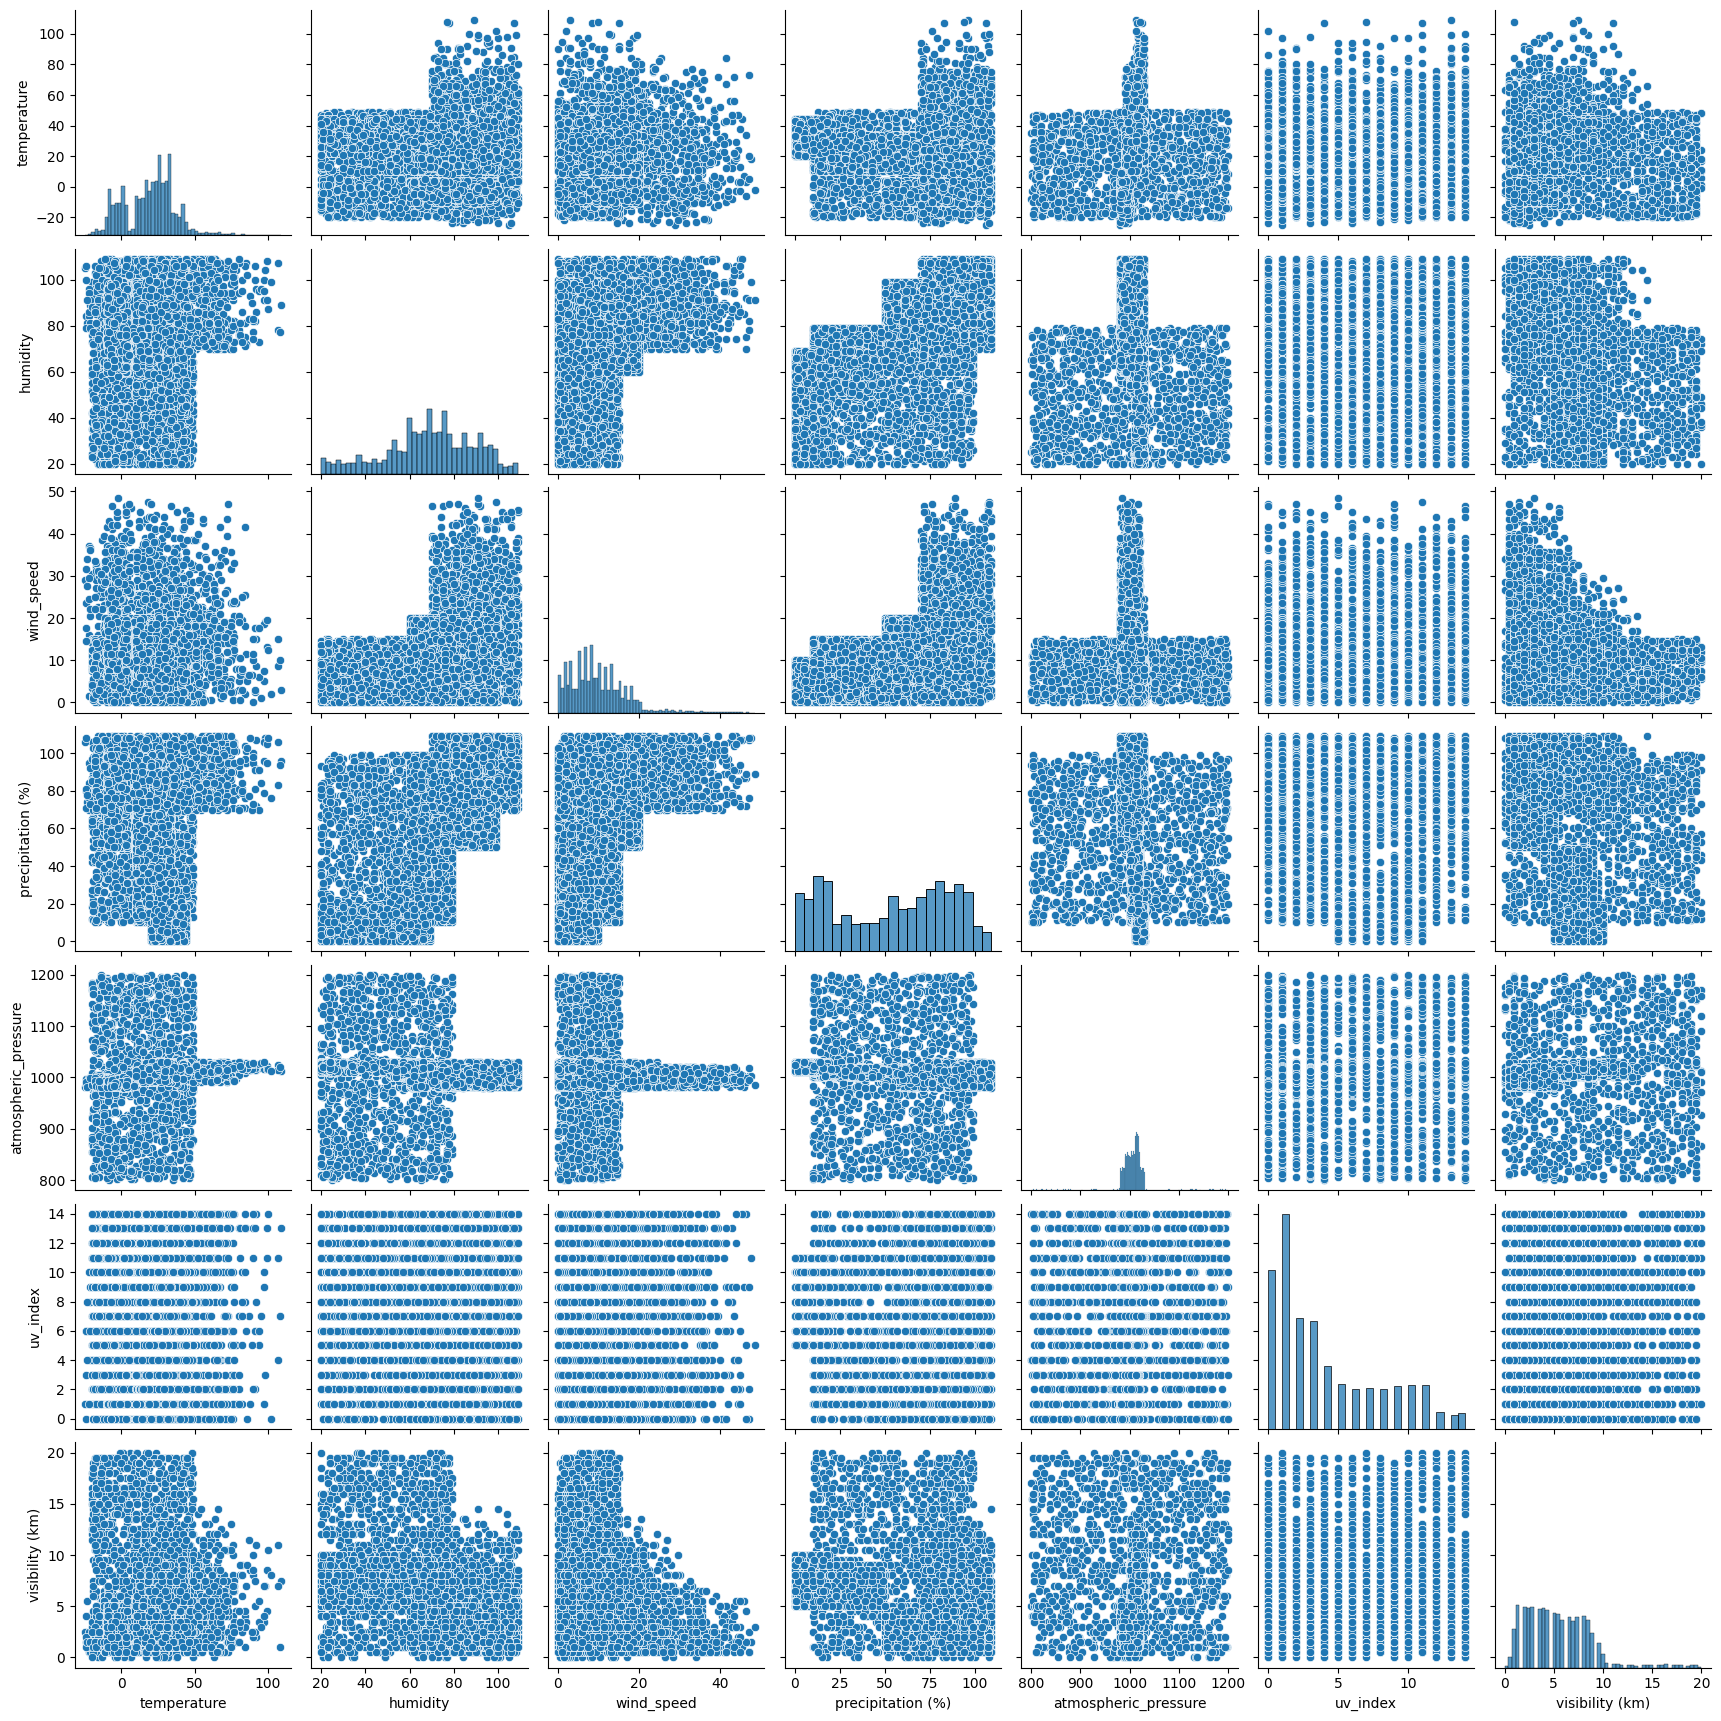

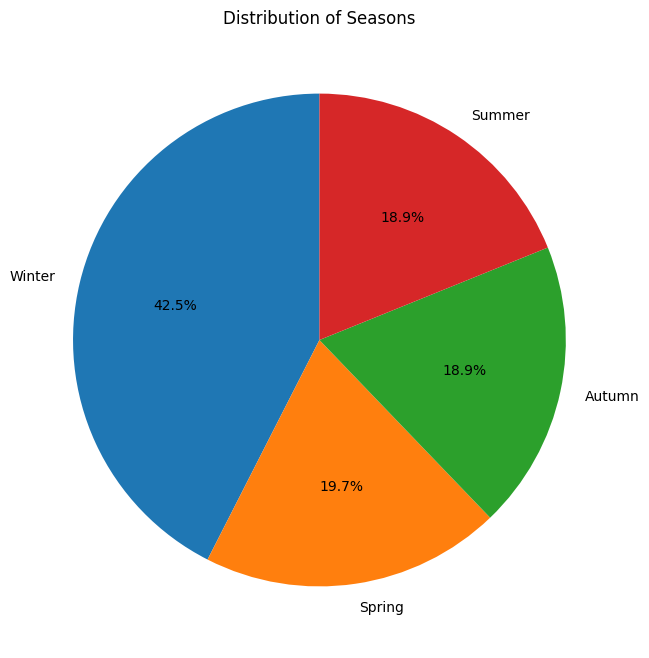

In [26]:
# Step 4: Visualize the distribution of key features
sns.pairplot(df)
# Visualize season using a pie chart
plt.figure(figsize=(8, 8))
df['season'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Seasons')
plt.ylabel('')
plt.show()

<Axes: xlabel='temperature', ylabel='Count'>

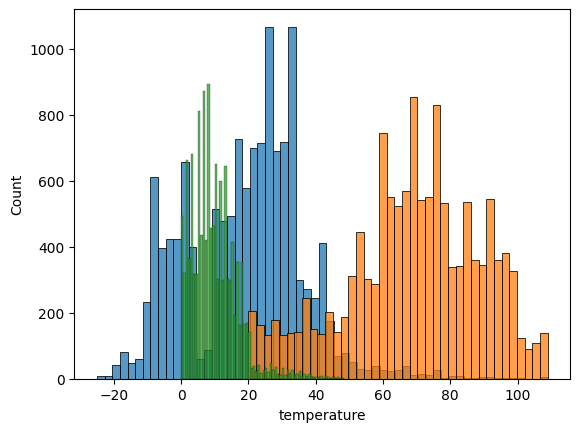

In [27]:
# Visualize temperature, humidity, and wind_speed using histograms
sns.histplot(df['temperature'])
sns.histplot(df['humidity'])
sns.histplot(df['wind_speed'])


<Axes: ylabel='precipitation (%)'>

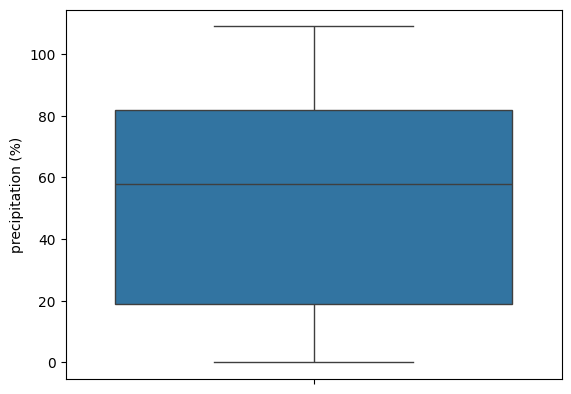

In [28]:
# Visualize precipitation (%) using a box plot
sns.boxplot(df['precipitation (%)'])

### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [29]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df1=pd.DataFrame(ohe.fit_transform(df[['cloud_cover','location','season']]).toarray(),columns=ohe.get_feature_names_out())
df=pd.concat([df,df1],axis=1)


In [30]:
# Step 2: Scale the numerical features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[['temperature', 'humidity', 'wind_speed', 'precipitation (%)',
       'atmospheric_pressure', 'uv_index', 'visibility (km)']]=sc.fit_transform(df[['temperature', 'humidity', 'wind_speed', 'precipitation (%)',
       'atmospheric_pressure', 'uv_index', 'visibility (km)']])

In [31]:
# Step3: Display the first few rows of the updated dataset.

df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,...,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_coastal,location_inland,location_mountain,season_Autumn,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,partly cloudy,0.134203,-0.520104,Winter,-0.582231,inland,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.143035,1.351385,-0.192836,0.543291,partly cloudy,0.150602,0.776424,Spring,1.345768,inland,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,clear,0.346579,0.257813,Spring,0.010999,mountain,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.085516,0.707613,-1.206089,0.887629,clear,0.549008,0.776424,Spring,-1.323769,coastal,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,overcast,-0.407490,-0.779410,Winter,-0.878846,mountain,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [34]:
# Step 1: Select features and target variable
model_selection = df.drop(['weather_type', 'cloud_cover', 'location', 'season'], axis=1)
target = df['weather_type']

# Step 2: Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(model_selection, target, test_size=0.3, random_state=42)

In [35]:
# Step 3: Train SVM with linear kernel
model=SVC(kernel='linear')
model.fit(x_train,y_train)

# Step 4: Print accuracy score
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

# Step 5: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.88510101010101

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.89      3960
   macro avg       0.89      0.88      0.88      3960
weighted avg       0.89      0.89      0.88      3960


Confusion Matrix:
 [[808  82  28  37]
 [ 49 852  67  14]
 [ 28  11 974  20]
 [ 57  29  33 871]]


In [37]:
# Step 5: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

#classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))









Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.89      3960
   macro avg       0.89      0.88      0.88      3960
weighted avg       0.89      0.89      0.88      3960


Confusion Matrix:
 [[808  82  28  37]
 [ 49 852  67  14]
 [ 28  11 974  20]
 [ 57  29  33 871]]


### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [40]:
# Step 1: Train SVM with RBF kernel
model=SVC(kernel='rbf')
model.fit(x_train,y_train)


# Step 2: Print accuracy score
print("Accuracy Score:", accuracy_score(y_test,y_pred))



# Step 3: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

#classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



#confusion matrix

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.88510101010101

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.89      3960
   macro avg       0.89      0.88      0.88      3960
weighted avg       0.89      0.89      0.88      3960


Confusion Matrix:
 [[808  82  28  37]
 [ 49 852  67  14]
 [ 28  11 974  20]
 [ 57  29  33 871]]


### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [47]:
# Step 1: Train the SVM model with specified hyperparameters

model = SVC(C=0.5, gamma='auto', kernel='rbf', degree=2)
model.fit(x_train, y_train)
# Step 2: Print the model's accuracy score

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 3: Make predictions on the test set

model.predict(x_test)

# Step 4: Evaluate the model using a classification report and confusion matrix
#classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))




#confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.88510101010101

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.89      3960
   macro avg       0.89      0.88      0.88      3960
weighted avg       0.89      0.89      0.88      3960


Confusion Matrix:
 [[808  82  28  37]
 [ 49 852  67  14]
 [ 28  11 974  20]
 [ 57  29  33 871]]
